#3. Free fall with air resistance: *solving a 2nd order ODE*
=========
The motion of an object falling under the influence of gravity and air resistance can be modeled
by the following second-order ODE:
\begin{equation} 
m\frac{d^2x}{dt^2} = mg - c(\frac{dx}{dt})^2
\end{equation}

where m = 70 kg is the mass of the object, $g = 9.81 \, m/s^2$
is the gravitational acceleration, and c = 0.25
kg/m is the drag coefficient.
* Converting the 2nd order ODE is a system of two 1st order ODEs, write a Python script to solve the
system of ODEs using the ***Euler*** and/or ***Runge-Kutta (RK4)*** methods. Use initial conditions
$x(0) = 0 m$ and $v(0) = 0 m/s$ for an object starting from rest.
* Plot the position $x(t)$ and velocity $v(t)$ of the object over time.
* Analyze the terminal velocity $v_{term}$ and how the solution behaves when air resistance becomes
significant

In [142]:
## Imports
import numpy as np ## Numpy
import matplotlib.pyplot as plt ## Matplotlib: to plot the result
def show_plot(): #plotting config 
    plt.title("Velocity of a Falling Object with Quadratic Air Resistance") 
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m/s)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()  

\begin{gather}
\frac{dx}{dt} = v = f_1(x, v)\\
\frac{dv}{dt} = g - \frac{cv^2}{m} = f_2(x, v)
\end{gather}


In [143]:
#define constants and functions
m = 70
g = 9.81
c = 0.25
start_x = 0
start_v = 0
start_t = 0
trg_t = 20
step = 2
f1 = lambda v : v
f2 = lambda v : g - ((c*(v**2))/m)
t_array = np.arange(start_t, trg_t + step, step)

In [144]:
#Generalized iteration
def iter_over_two_eq_system(t_array, slopes):
    slope1 = slopes[0]
    slope2 = slopes[1]
    x_array = []
    v_array = []
    current_x = start_x
    current_v = start_v

    for t in t_array:
        x_array.append(current_x)
        v_array.append(current_v)

        tmp_x = current_x + slope1(current_v) #make sure use old val
        tmp_v = current_v + slope2(current_v)

        current_x, current_v = tmp_x, tmp_v

    return x_array, v_array

Let's compare this with the RK2 method. We get the following system of equations:
\begin{gather}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = g - \frac{cv^2}{m} \\
k_1^x = hv_n \\
k_1^v = h(g - \frac{cv_n^2}{m}) \\
k_2^x = h(v_n + \frac{k_1^v}{2}) \\
k_2^v = h \left[ g - \frac{c(v_n+ \frac{k_1^v}{2})^2}{m} \right] \\
v_{n+1} = v_n +k_2^v
\end{gather}


In [145]:
def euler():
    euler1 = lambda v: step * f1(v) #since y isn't used we can streamline with 1 var
    euler2 = lambda v: step * f2(v)
    return euler1, euler2
    
def rk2():
    k1x = lambda v: step * f1(v)
    k1v = lambda v: step * f2(v)

    k2x = lambda v: step * f1(v + (k1x(v)/2)) 
    k2v = lambda v: step * f2(v + (k1v(v)/2)) 
    return k2x, k2v

def rk4():
    k1x = lambda v: step * f1(v)
    k1v = lambda v: step * f2(v)

    k2x = lambda v: step * f1(v + (k1x(v)/2)) 
    k2v = lambda v: step * f2(v + (k1v(v)/2)) 

    k3x = lambda v: step * f1(v + (k2x(v)/2)) 
    k3v = lambda v: step * f2(v + (k2v(v)/2)) 

    k4x = lambda v: step * f1(v + (k3x(v))) 
    k4v = lambda v: step * f2(v + (k3v(v))) 

    rk_slope_x = lambda v: (1/6) * (k1x(v) + 2*k2x(v) + 2*k3x(v) + k4x(v))
    rk_slope_v = lambda v: (1/6) * (k1v(v) + 2*k2v(v) + 2*k3v(v) + k4v(v))
    return rk_slope_x, rk_slope_v

In [146]:
v_t = np.sqrt(m*g/c)

def theoretic(t): #http://www.hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/quadvfall.html
    return v_t* np.tanh(t*g/v_t) #simplified since v_0 = 0 and t_0 = 0

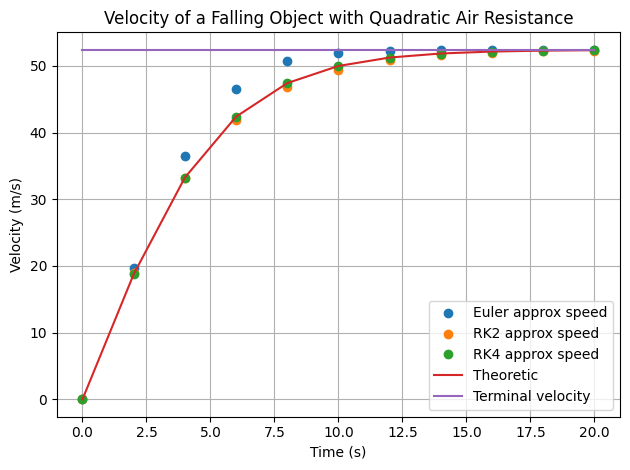

In [147]:
step = 2
t_array = np.arange(start_t, trg_t + step, step)

plt.plot(t_array, iter_over_two_eq_system(t_array, euler())[1], "o", label="Euler approx speed")  
plt.plot(t_array, iter_over_two_eq_system(t_array, rk2())[1], "o", label="RK2 approx speed")  
plt.plot(t_array, iter_over_two_eq_system(t_array, rk4())[1], "o", label="RK4 approx speed")  
plt.plot(t_array, np.vectorize(theoretic)(t_array), "-", label="Theoretic")
plt.plot(t_array, np.vectorize(lambda t : v_t)(t_array), "-", label="Terminal velocity")
show_plot()